In [1]:
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

from utils import ENVIRONMENT

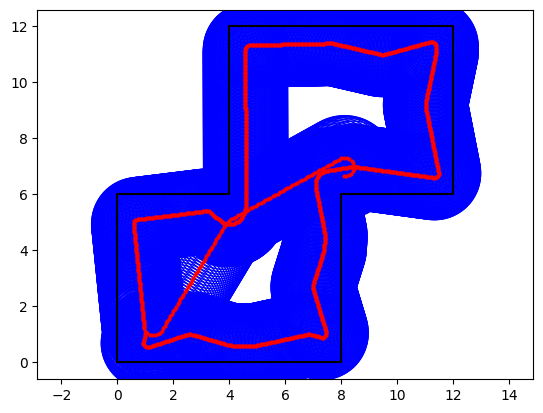

In [2]:
x, y = ENVIRONMENT.exterior.xy
plt.figure()
plt.axis("equal")
plt.plot(x, y, color="black")

with open("out/visited_positions.csv", "r") as f:
    for line in f:
        vx, vy = map(float, line.strip().split(","))
        plt.plot(vx, vy, marker="o", color="red", markersize=2)
        c = plt.Circle((vx, vy), 1.5, color="blue", fill=False)
        plt.gca().add_artist(c)

plt.show()

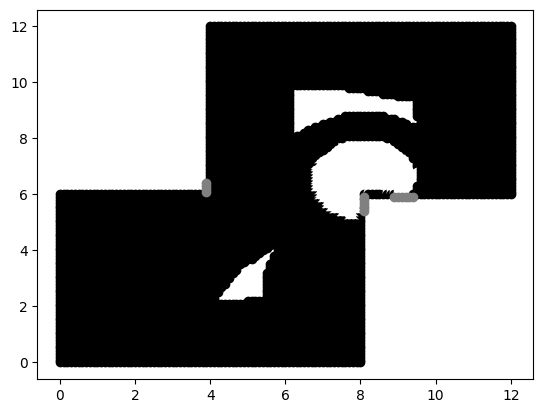

In [3]:
plt.figure()

with open("out/occupancy_grid.csv", "r") as f:
    for line in f:
        parts = line.strip().split(",")
        x, y = map(float, parts[:2])
        t = parts[2].strip()
        color = "black" if t == "OCCUPIED" else "white" if t == "FREE" else "gray"
        plt.plot(x, y, "o", color=color)

plt.show()

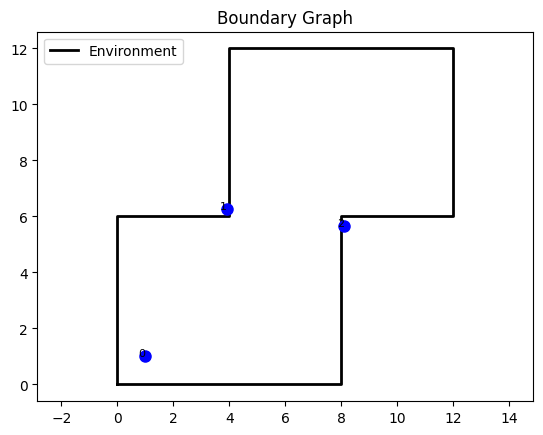

In [4]:
plt.figure()
plt.axis("equal")

# Plot the environment boundary
env_x, env_y = ENVIRONMENT.exterior.xy
plt.plot(env_x, env_y, color="black", linewidth=2, label="Environment")

# Read and plot the boundary graph nodes
with open("out/boundary_graph.csv", "r") as f:
    for line in f:
        parts = line.strip().split(",")
        if parts[0] == "NODE":
            node_id = int(parts[1])
            node_x = float(parts[2])
            node_y = float(parts[3])

            plt.plot(node_x, node_y, marker="o", color="blue", markersize=8)
            plt.text(node_x, node_y, f"{node_id}", fontsize=8, ha="right")

plt.legend()
plt.title("Boundary Graph")
plt.show()